# Polynomial Rgression, Learning Curves

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas as pd
np.random.seed(42)

**Question** load `data150.csv` in a dataframe `df_train`.

In [44]:
df_train = pd.read_csv('data150.csv')

df_train.shape

(50, 2)

**Question** Examine the 5 first lines. Print descriptive stats. Plot the set of points with the variable to be predicted `t` on the ordinate. Name `X` and `y` the objects containing the data description and the variable to be predicted.  

In [45]:
df_train.head()

,x,t
0,0.140280,9.880310
1,0.903858,10.227492
2,0.535815,10.163115
3,0.358392,9.937107
4,0.024342,9.881466


In [46]:
df_train.describe()

,x,t
count,50.000000,50.000000
mean,0.280633,9.994401
std,0.291519,0.150313
min,0.000424,9.739527
25%,0.033771,9.884021
50%,0.190155,9.962842
75%,0.422793,10.033667
max,0.940725,10.380997


In [47]:
X = df_train['x'].values.reshape((-1, 1))
X.shape

(50, 1)

In [48]:
y = df_train['t'].values
y.shape

(50,)

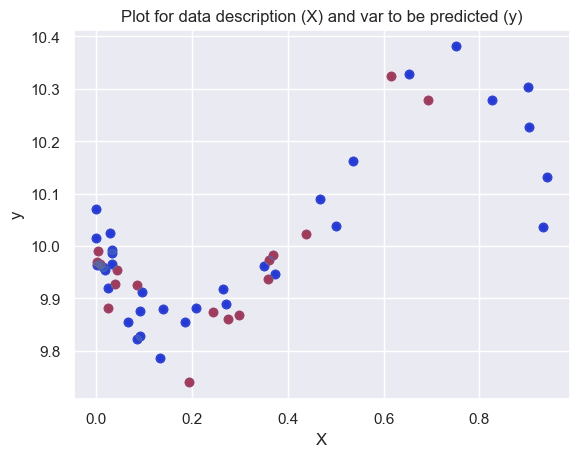

In [49]:
plt.scatter(X, y, alpha=0.5)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Plot for data description (X) and var to be predicted (y)')

plt.show()

**Question** Split `X` and `y` to create training and validation sets (2/3 and 1/3).

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(33, 1) (17, 1) (33,) (17,)


**Question** Learn a linear regression model and estimate its validation score.  

In [52]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [53]:
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
lr.score(X_valid, y_valid)

0.38765059933087564

**Question** Plot in a diagamma, the points in blue for the training data, in red for the validation data and in black the regression line just calculated.

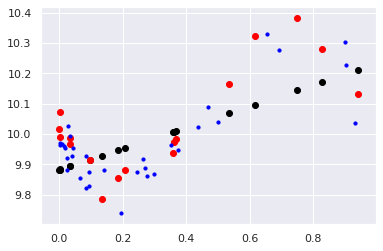

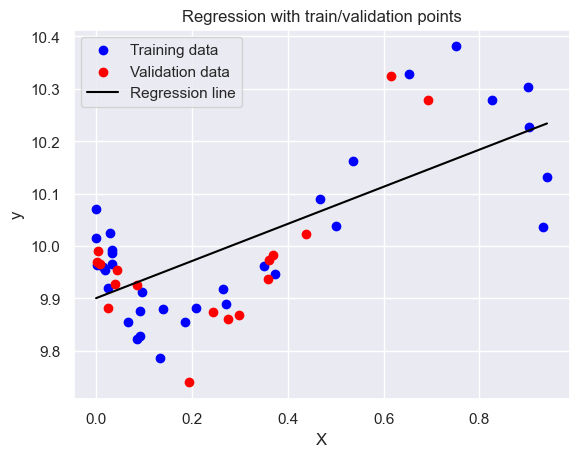

In [55]:
# Plot training points in blue
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot validation points in red
plt.scatter(X_valid, y_valid, color='red', label='Validation data')

# Plot regression line in black
# Create evenly spaced points in X range
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = lr.predict(X_line)
plt.plot(X_line, y_line, color='black', label='Regression line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression with train/validation points')
plt.legend()
plt.show()


## Adding Attributes

**Question** In the attributes describing the data, add the square of `X`. After this operation, we should have `X2_train` and `X2_valid` with dimensions (50,2)

In [56]:
df_train['square'] = df_train['x'] ** 2
df_train.head()

,x,t,square
0,0.140280,9.880310,0.019679
1,0.903858,10.227492,0.816959
2,0.535815,10.163115,0.287098
3,0.358392,9.937107,0.128445
4,0.024342,9.881466,0.000593


In [57]:
X2 = df_train[['x', 'square']].values  
X2.shape

(50, 2)

In [58]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y, test_size=0.33, random_state=42)
print(X2_train.shape, X2_valid.shape, y2_train.shape, y2_valid.shape)

(33, 2) (17, 2) (33,) (17,)


**Question** Retrain the linear model with this new representation of the data (containing both $x$ and $x^2$).

In [59]:
lr.fit(X2_train, y2_train)

LinearRegression()

**Question** Now plot the points in blue for the training data, in red for the test data and in black for the regression curve just calculated.

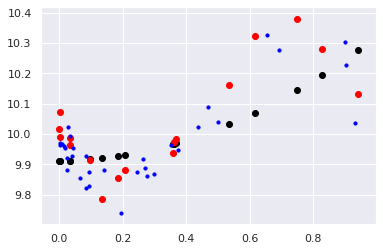

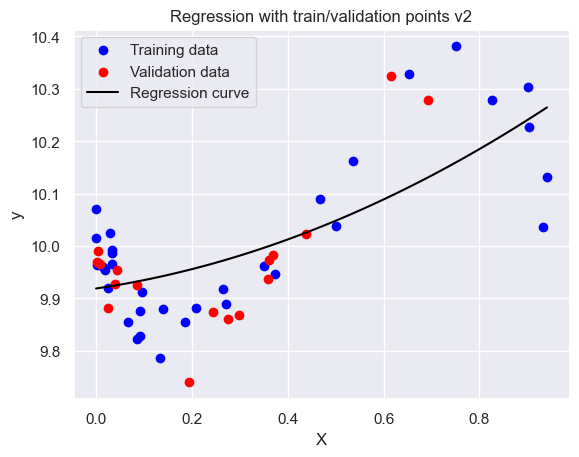

In [60]:
# Plot training points in blue
plt.scatter(X2_train[:, 0], y2_train, color='blue', label='Training data')

# Plot validation points in red
plt.scatter(X2_valid[:, 0], y2_valid, color='red', label='Validation data')

# X2_line = [[x1, x1²],
# ...
# [x100, x100²]]
X_line_feature = np.linspace(X2[:, 0].min(), X2[:, 0].max(), 100) # 100 evenly spaced values between the min and max of the first feature (X2[:, 0] — the original x values).
X2_line = np.column_stack((X_line_feature, X_line_feature ** 2))

y2_line = lr.predict(X2_line)

# Plot the regression curve
plt.plot(X_line_feature, y2_line, color='black', label='Regression curve')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression with train/validation points v2')
plt.legend()
plt.show()


**Question** Now write a `poly` function that takes as argument a  dataset `X` and a  degree `d` and calculates a new representation with all monomials between 1 and `d`.

    # Example : 
    poly(X, 3)
    array([[1.40280301e-01, 1.96785627e-02, 2.76051470e-03],
       [9.03857692e-01, 8.16958728e-01, 7.38414431e-01],
       [5.35815131e-01, 2.87097854e-01, 1.53831374e-01],
       [3.58391981e-01, 1.28444812e-01, 4.60335905e-02],
       [2.43418162e-02, 5.92524014e-04, 1.44231106e-05],
       [2.43342904e-02, 5.92157688e-04, 1.44097371e-05], ...

In [61]:
def poly(X, d):
    n = len(X)
    res = np.zeros((n, d))
    
    for i in range(n):
        for power in range(1, d + 1):
            res[i, power - 1] = X[i] ** power
    
    return res


**Question** Build a list with all regression scores for 20 data representations including all monomials from 1 to 20: (the $i^e$ result contains all monomials from 1 to $i$).

In [62]:
initial_X = df_train['x'].values.reshape((-1, 1))
y = df_train['t'].values

X_train_base, X_valid_base, y_train, y_valid = train_test_split(initial_X, y, test_size=0.33, random_state=42)

reg_score = []
lr = linear_model.LinearRegression()

for degree in range(1, 21):
    X_train = poly(X_train_base.flatten(), degree) 
    X_valid = poly(X_valid_base.flatten(), degree)
    
    lr.fit(X_train, y_train)
    score = lr.score(X_valid, y_valid)
    reg_score.append(score)

print(reg_score)

[0.38765059933087564, 0.46608165696488524, 0.9050377687293201, 0.9056583743163148, 0.8789410128191321, 0.8694388485254754, 0.8694486484167078, 0.8514706034526703, 0.8528928544272285, 0.8492845958675881, 0.847433939709652, 0.8064516178233655, 0.7860815980222571, 0.8276226985763264, 0.7810597518794099, 0.8761035039299377, 0.8491720972732817, 0.8460646243764278, 0.8560229863060759, 0.8621929460545387]


**Question** What do you see? Can you explain what happens? Why do results deteriorate as data representation becomes richer?  

*Answer :* The validation score is highest when degree is 3 and 4. For low degrees the model underfits.
After the score is steadily high for degrees 5 to 18, but then suddenly drops for 19 and 20. In other words, the model starts to overfit as the degree increases. This means that the degree of 3 or 4 is the best hyper parameter to choose.

## Same approach using Sklearn

**Question** Import `PolynomialFeatures` from `sklearn.preprocessing` and print a representation of `X` with degree 3. You should obtain

     array([[1.00000000e+00, 1.73907352e-01, 3.02437672e-02, 5.25961348e-03],
       [1.00000000e+00, 5.18867376e-01, 2.69223354e-01, 1.39691215e-01],
       [1.00000000e+00, 1.30815988e-08, 1.71128228e-16, 2.23863083e-24],
       [1.00000000e+00, 9.14049845e-02, 8.35487119e-03, 7.63676871e-04],
       [1.00000000e+00, 2.15372915e-02, 4.63854925e-04, 9.99017872e-06], ...

In [63]:
from sklearn.preprocessing import PolynomialFeatures 

In [64]:
X = df_train['x'].values.reshape((-1, 1))

poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[1.00000000e+00, 1.40280301e-01, 1.96785627e-02, 2.76051470e-03],
       [1.00000000e+00, 9.03857692e-01, 8.16958728e-01, 7.38414431e-01],
       [1.00000000e+00, 5.35815131e-01, 2.87097854e-01, 1.53831374e-01],
       [1.00000000e+00, 3.58391981e-01, 1.28444812e-01, 4.60335905e-02],
       [1.00000000e+00, 2.43418162e-02, 5.92524014e-04, 1.44231106e-05],
       [1.00000000e+00, 2.43342904e-02, 5.92157688e-04, 1.44097371e-05],
       [1.00000000e+00, 3.37370600e-03, 1.13818922e-05, 3.83991580e-08],
       [1.00000000e+00, 7.50261116e-01, 5.62891741e-01, 4.22315786e-01],
       [1.00000000e+00, 3.61339257e-01, 1.30566059e-01, 4.71786428e-02],
       [1.00000000e+00, 5.01366775e-01, 2.51368644e-01, 1.26027886e-01],
       [1.00000000e+00, 4.23721405e-04, 1.79539829e-07, 7.60748688e-11],
       [1.00000000e+00, 9.40725121e-01, 8.84963754e-01, 8.32507635e-01],
       [1.00000000e+00, 6.92960750e-01, 4.80194601e-01, 3.32756011e-01],
       [1.00000000e+00, 4.50878979e-02, 2.03291854e

**Note about Python** You can represent a set of function parameters  using dictionaries.  Example:

In [65]:
dic = {'loc':5, 'scale':2}
print(np.random.normal(size=5, **dic))

def f(x, **kwargs):
    return [i>0 for i in np.random.normal(size=x, **kwargs)]

print(f(10))
print(f(10, loc=20))
print(f(10, loc=20, scale=100))
dic = {'loc':5, 'scale':2}
print(f(10,**dic))

[5.99342831 4.7234714  6.29537708 8.04605971 4.53169325]
[np.False_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_]
[np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_]
[np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.True_, np.False_, np.True_]
[np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_]


**Question** There's a `make_pipeline` function in `sklearn` that makes chaining operations very simple. Define a new function `ma_regression` which takes a degree as argument and a list of other arguments intended for the `LinearRegression` function (use the dictionary trick above for them), and composes a polynomial representation change and a regression.

In [66]:
from sklearn.pipeline import make_pipeline

def ma_regression(d, **lrargs):
    model = make_pipeline(
        PolynomialFeatures(degree = d),
        linear_model.LinearRegression(**lrargs)
    )
    return model

**Question**  Use this function to estimate the error of a linear regression with polynomial transformations up to degree 3.

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

model = ma_regression(3)

model.fit(X_train, y_train)

print(model.score(X_valid, y_valid))


0.9050377687293203


## Learning Curve  as a function of degree

**Question** Using `validation_curve`, perform a 5-fold cross-validation on `X`, applying all representation changes with a degree between 1 and `max_degree`, which we set to 15. To do this, take a look at the `validation_curve` help in `sklearn.model_selection`. Use of course `ma_regression`. This gives validation scores like this:

     [[ 0.49293082  0.66030384  0.65039394  0.69193837  0.6167657 ]
      [ 0.57202662  0.66235604  0.60475979  0.73104306  0.61910942]
      ...
      [ 0.87350381  0.93056784 -0.56590723  0.87945086  0.87330041]]
       

In [83]:
from sklearn.model_selection import validation_curve

max_degree = 15
param_range = np.arange(1, max_degree + 1)

train_scores, test_scores = validation_curve(
    estimator=ma_regression(1),     
    X=X, y=y,
    param_name='polynomialfeatures__degree',
    param_range=param_range,
    cv=5
)

**Question** We can then plot the training and validation error curves. Since we are validating on 5 parts, we obtain 5 results per degree. For the curve, we plot the median value (the average over 5 values may be more strongly affected by a very good or very bad result). It should look something like this. 

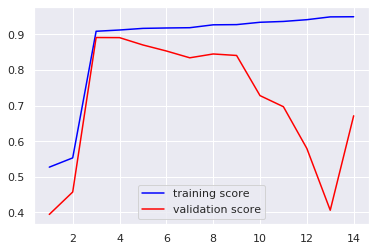

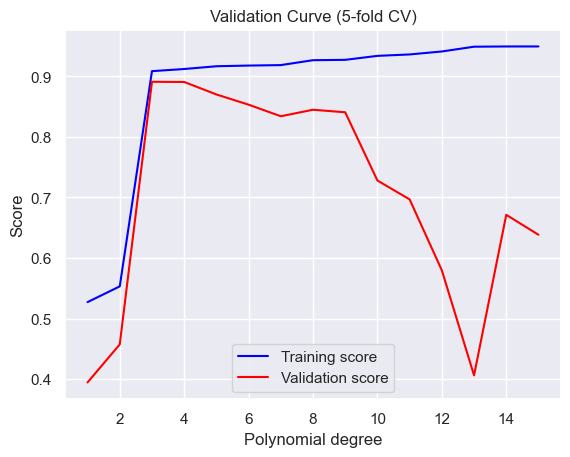

In [84]:
train_scores_median = np.median(train_scores, axis = 1)
test_scores_median = np.median(test_scores, axis = 1)

plt.plot(param_range, train_scores_median, color='blue', label='Training score')
plt.plot(param_range, test_scores_median, color='red', label='Validation score')

plt.xlabel('Polynomial degree')
plt.ylabel('Score')
plt.title('Validation Curve (5-fold CV)')
plt.legend()
plt.show()

**Question** How do you interpret the results?

*Answer :* At a low degree, both validation and training scores are low. This means the model underfits and the degree is not enough to train the data.
But as the degree increases the training score steadily increases, while the validation score slowly decreases before hiting a sudden dip. This means the model overfits with big degrees. 

**Question** Now plot the figure showing the estimated curve and the points in the valid and train sample. To do this, I used `linspace` to obtain 100 points evenly spaced over the interval $[min(X),max(X)]$, calculated their prediction and used `plot` to plot the curve and `scatter` with the `s` option to change the size of the points. For example, for degree 3 it looks like this, but have a look at several degree values

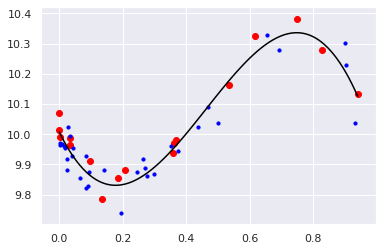

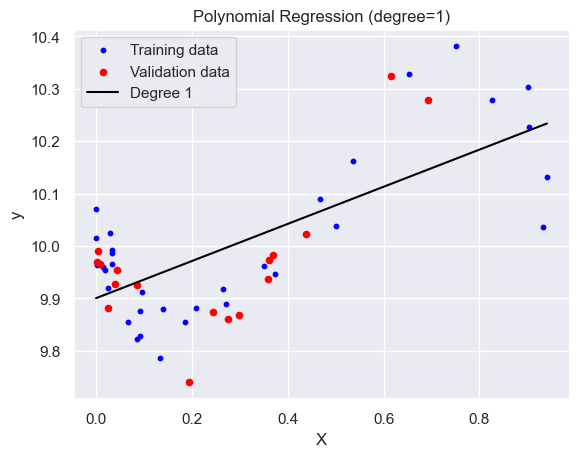

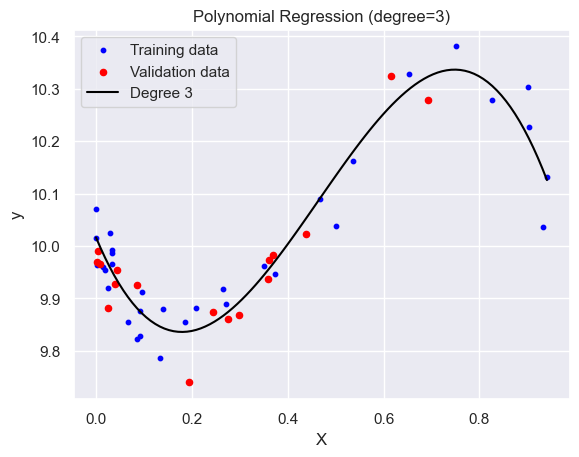

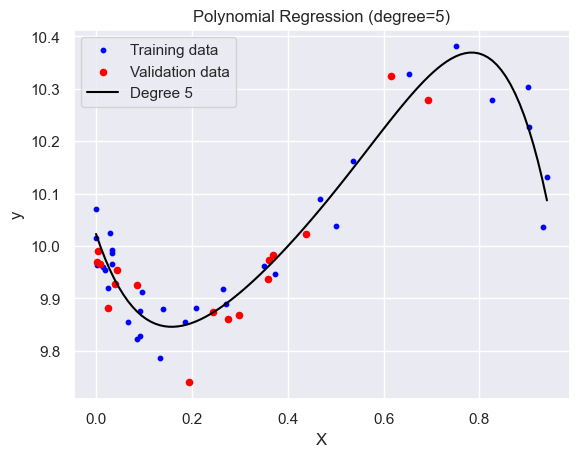

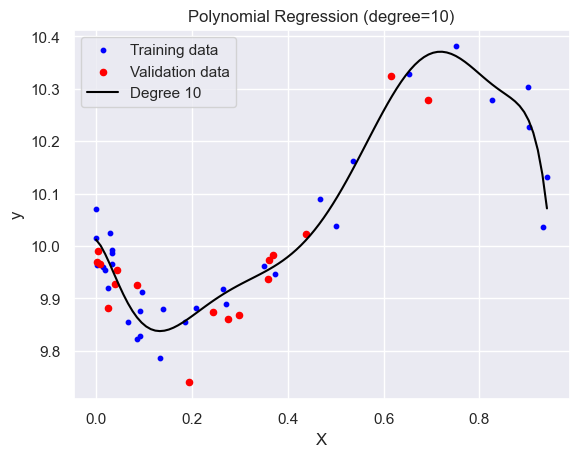

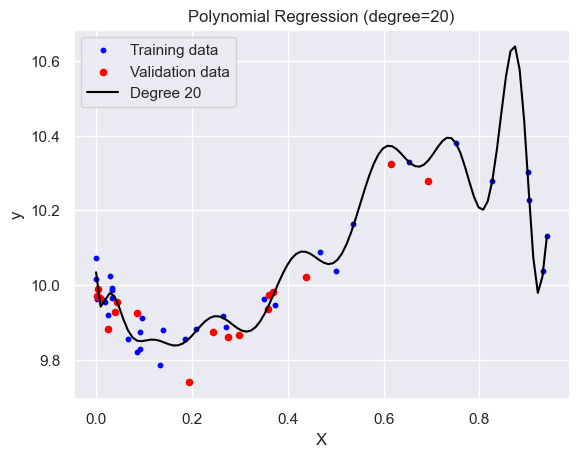

In [87]:
degrees_to_plot = [1, 3, 5, 10, 20]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

for d in degrees_to_plot:
    model = ma_regression(d)
    model.fit(X_train, y_train)
    y_plot = model.predict(x_plot)
    
    plt.figure()
    plt.scatter(X_train, y_train, color='blue', s=10, label='Training data')
    plt.scatter(X_valid, y_valid, color='red', s=20, label='Validation data')
    plt.plot(x_plot, y_plot, color='black', label=f'Degree {d}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (degree={d})')
    plt.legend()
    plt.show()


## Learning curve as a function of sample size


**Question** Load `dataGrand.csv` and name `X_g` (nd-array) et `y_g` (1d-array).

In [88]:
df_grand = pd.read_csv('dataGrand.csv')

df_grand.shape

(200, 2)

In [91]:
X_g = df_grand['x'].values.reshape(-1, 1)
X_g.shape

(200, 1)

In [92]:
y_g = df_grand['t'].values
y_g.shape

(200,)

**Question** Now use `learning_curve` from the `sklearn.model_selection` library. Using the example given in the [documentation](https://scikit-learn.org/stable/modules/learning_curve.html#validation-curve), calculate the results of learning with `ma_regression` for degrees $3, 5, 10, 15$, taking 10 learning set sizes between 
20% and 100% (with `np.linspace(0.01, 1, 10)`).

In [100]:
from sklearn.model_selection import learning_curve

degrees = [3, 5, 10, 15]

results = {}

for d in degrees:
    model = ma_regression(d)
    train_sizes_abs, train_scores, valid_scores = learning_curve(
        model, X_g, y_g,
        train_sizes = np.linspace(0.2, 1.0, 10),
        cv=5
    )
    results[d] = (train_sizes_abs, train_scores, valid_scores)

**Question** Draw the 4 curves that should look like the ones below and analyze the results. What do you conclude? 

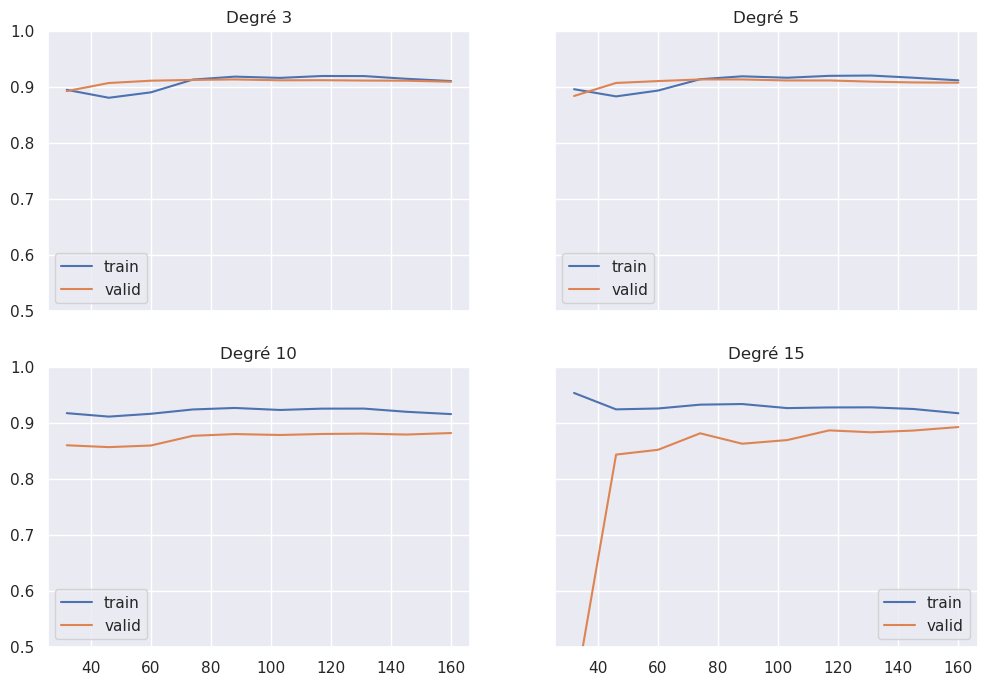

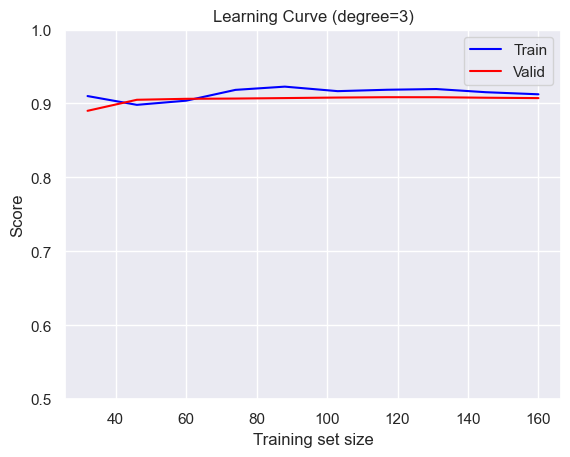

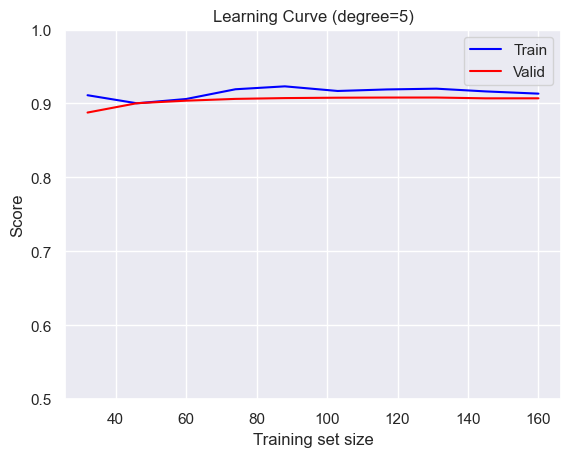

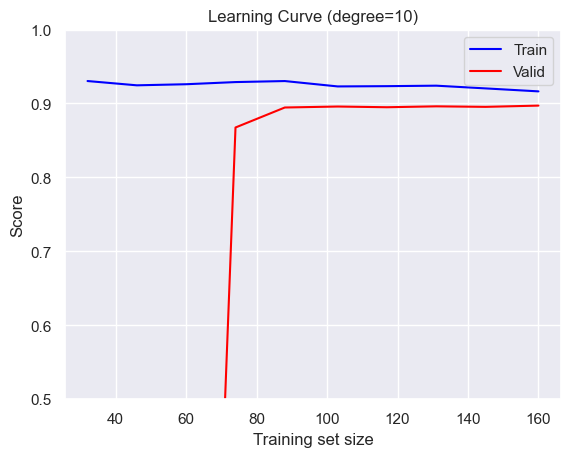

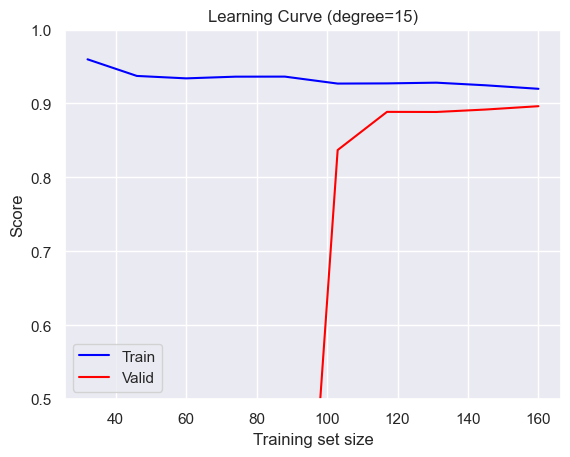

In [121]:
for d in degrees:
    train_sizes_abs, train_scores, valid_scores = results[d]
    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    
    plt.figure()
    plt.plot(train_sizes_abs, train_mean, color = 'blue', label='Train')
    plt.plot(train_sizes_abs, valid_mean, color = 'red', label='Valid')
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.title(f'Learning Curve (degree={d})')
    plt.ylim(0.5, 1.0)
    plt.legend()
    plt.show()

*Answer :* For low degrees 3 and 5, training and validation curves converge. Which means models generalize well and stabilize with enough data.
For high degrees 10 and 15, the gap between training and validation scores remains large, which means the model overfits.
The optimal degree is around 3–5 in this case.

## Grid search

Here, we're going to search for hyperparameters by examining numerous values for several parameters: we're building a grid of several possible values. This is what we call *grid search*, which is generally quite costly...

**Question** Load `dataPlusGrand.csv` in `X_pg` and `y_pg`

In [114]:
df_plusgrand = pd.read_csv('dataPlusGrand.csv')
df_plusgrand.shape

(500, 2)

In [115]:
X_pg = df_plusgrand['x'].values.reshape(-1, 1)
X_pg.shape

(500, 1)

In [116]:
y_pg = df_plusgrand['t'].values
y_pg.shape

(500,)

**Question** Build a pipeline with a polynomial transform and an estimator of the class `Ridge`

In [117]:
from sklearn.linear_model import Ridge

pipe = make_pipeline(
    PolynomialFeatures(),
    Ridge()
)

**Question** Read the documentation of `GridSearchCV`. Compose a search grid examining all degrees between 1 and 15 and for alpha values in the set `[1e-3, 1e-2, 1e-1, 1]`.

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree': np.arange(1, 16),
    'ridge__alpha': [1e-3, 1e-2, 1e-1, 1]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5
)

grid.fit(X_pg, y_pg)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'ridge__alpha': [0.001, 0.01, 0.1, 1]})

**Question** What are the best parameters? What is the score of the best model on `X_pg`, `y_pg`?

In [119]:
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'polynomialfeatures__degree': np.int64(3), 'ridge__alpha': 0.001}
Best CV score: 0.9082954718470448
